In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [42]:
# Load the dataset
file_path = 'data/fashion-mnist_test.csv'
data = pd.read_csv(file_path)

# Split into train and val
X = data.drop(columns=['label'])
y = data['label']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [48]:
pca = PCA(n_components=50)  # Adjust the n_components parameter as needed
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='multinomial', random_state=42)
log_reg.fit(X_train_pca, y_train)

# Predict on the validation set
y_pred = log_reg.predict(X_val_pca)

# Calculate accuracy and display classification report
print(f"accuracy = {accuracy_score(y_val, y_pred)}")
print(classification_report(y_val, y_pred))

accuracy = 0.8245
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       200
           1       0.94      0.94      0.94       200
           2       0.72      0.67      0.70       200
           3       0.86      0.83      0.85       200
           4       0.74      0.77      0.75       200
           5       0.91      0.91      0.91       200
           6       0.57      0.59      0.58       200
           7       0.89      0.91      0.90       200
           8       0.94      0.94      0.94       200
           9       0.91      0.93      0.92       200

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## From Scratch implementation

In [96]:
N, M = X_train.shape
K = 60
# Normalize the data
X_train_norm = X_train - np.mean(X_train,axis=0)
X_val_norm = X_val - np.mean(X_train,axis=0)

# Covariance matrix
cov_matrix = np.cov(X_train_norm.T, bias=True) # bias = True, to divide with N instead of N-1

# Eigenvalues and eigenvectors of Covariance matrix, keep only real part
eig_val, eig_vec = np.linalg.eig(cov_matrix)
eig_vec = eig_vec.real
eig_val = eig_val.real

# Sort the Eigenvalues and eigenvectors
sorted_indexes = np.argsort(eig_val)[::-1]
eig_val = eig_val[sorted_indexes]
eig_vec = eig_vec[:,sorted_indexes]

#Select top K eigenvectors
eigenvectors = eig_vec[:,:K]
eigenvalues = eig_val[:K]

# Convert basis
eig_train_x = np.dot(X_train_norm,eigenvectors)
eig_val_x = np.dot(X_val_norm,eigenvectors)

In [105]:
explained_variance_ratio = [i/np.sum(eigenvalues) for i in eigenvalues]
cum_explained_variance = np.cumsum(explained_variance_ratio)
threshold_index = next(i for i, total in enumerate(cum_explained_variance) if total >= 0.95)

# PC required for 95% variance explained
print(f"The number of principal components required to explain 95% variance: {threshold_index}")
# Print values up to 95%
print(f"Cumulative Explained Variance up to 95%: {cum_explained_variance[:threshold_index + 1]}")

The number of principal components required to explain 95% variance: 34
Cumulative Explained Variance up to 95%: [0.32906424 0.53386725 0.60173526 0.65858812 0.70221512 0.7415592
 0.76825732 0.78941087 0.80513829 0.82046184 0.83185748 0.84235001
 0.85130792 0.8589371  0.86609385 0.87277943 0.87913526 0.88491734
 0.89025852 0.89536085 0.90030921 0.90494304 0.90937501 0.91367667
 0.91780449 0.92177768 0.92556845 0.92921511 0.93278376 0.93614625
 0.93932091 0.94239594 0.94542732 0.94843923 0.95129378]


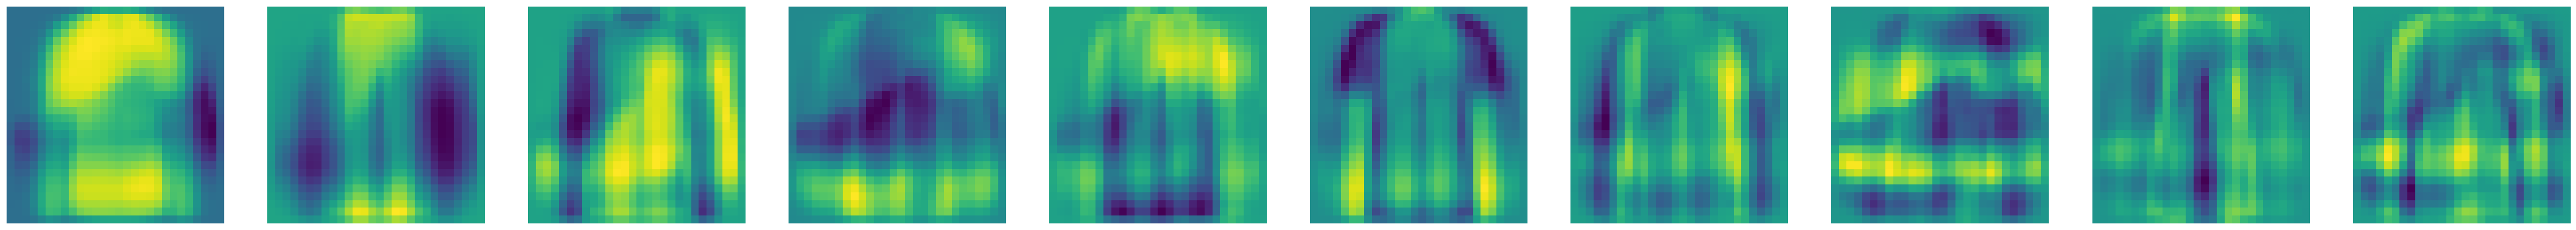

In [118]:
ig, ax = plt.subplots(1,10, figsize=(50,50))
for a in ax:
  for i in range(10):
    a.set_axis_off()
    ax[i].imshow(np.reshape(eigenvectors[:,i], (28,28)))

In [70]:
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='multinomial', random_state=42)
log_reg.fit(eig_train_x, y_train)

# Predict on the validation set
y_pred = log_reg.predict(eig_val_x)

# Calculate accuracy and display classification report
print(f"accuracy = {accuracy_score(y_val, y_pred)}")
print(classification_report(y_val, y_pred))

accuracy = 0.8255
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       200
           1       0.94      0.95      0.95       200
           2       0.73      0.68      0.70       200
           3       0.87      0.84      0.85       200
           4       0.74      0.76      0.75       200
           5       0.91      0.91      0.91       200
           6       0.57      0.60      0.59       200
           7       0.88      0.90      0.89       200
           8       0.94      0.94      0.94       200
           9       0.91      0.93      0.92       200

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
